In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
al = '..//Data//out.moreno_crime_crime'
gender = '..//Data//ent.moreno_crime_crime.person.sex'
name = '..//Data//ent.moreno_crime_crime.person.name'
role = '..//Data//rel.moreno_crime_crime.person.role'

In [3]:
al_df = pd.read_csv(al, sep=" ", header=None, names=['person', 'crime', 'bla'])
al_df.drop(al_df.columns[len(al_df.columns)-1], axis=1, inplace=True)
al_df['person'] = 'p' + al_df['person'].astype(str)
al_df['crime'] = 'c' + al_df['crime'].astype(str)
al_df

,person,crime
0,p1,c1
1,p1,c2
2,p1,c3
3,p1,c4
4,p2,c5
...,...,...
1471,p825,c399
1472,p826,c300
1473,p827,c265
1474,p828,c298


In [4]:
gender_df = pd.read_csv(gender, sep=" ", header=None)
gender_df.head(3)
gender_df.shape

(829, 1)

In [5]:
name_df = pd.read_csv(name, sep=" ", header=None)
name_df.head(3)
name_df.shape

(829, 1)

In [6]:
role_df = pd.read_csv(role, sep=",", header=None)
role_df.head(3)
role_df[0][2]
role_df.shape

(1476, 1)

In [7]:
people = al_df['person'].unique()
crimes = al_df['crime'].unique()

In [13]:
len(people) + len(crimes)

1380

In [23]:

# create networkx graph
G=nx.Graph()

# G.add_nodes_from(people, bipartite=0, )
# # add nodes
for i in range(len(people)):
    # print(al_df['person'][i])
    G.add_node(al_df['person'][i], name=name_df[0][i], gender=gender_df[0][i], bipartite=0)

for i in range(len(crimes)):
    G.add_node(al_df['crime'][i], bipartite=1)

# # add edges
for i in range(len(al_df)):
    # print(al_df['person'][i], al_df['crime'][i])
    G.add_edge(al_df['person'][i], al_df['crime'][i])

In [33]:
print('Num. of nodes: {} \nNum. of edges: {}'.format(G.number_of_nodes(), G.number_of_edges()))

Num. of nodes: 1380 
Num. of edges: 1476


ValueError: Received invalid argument(s): k

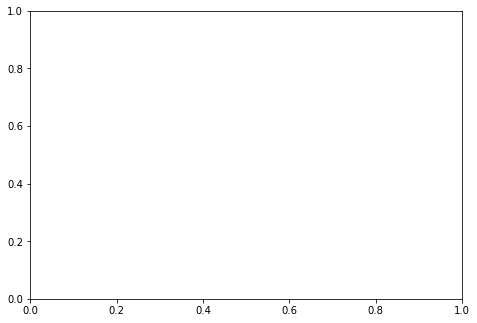

In [38]:
options = {
    'node_color': 'orange',
    'node_size': 50,
    # 'width': 3,
    'edge_color': 'black', 
    'linewidths': 1, 
    'font_size': 8,
    'with_labels': True,
    'k': 10
}

pos=nx.spring_layout(G)
nx.draw(G, pos, **options)